In [67]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('life_expectancy.csv')
df = df.rename(columns=lambda x: x.strip())
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [69]:
cyslg_df = df[['Country', 'Year', 'Status', 'Life expectancy', 'GDP']]
cyslg_df

,Country,Year,Status,Life expectancy,GDP
0,Afghanistan,2015,Developing,65.0,584.259210
1,Afghanistan,2014,Developing,59.9,612.696514
2,Afghanistan,2013,Developing,59.9,631.744976
3,Afghanistan,2012,Developing,59.5,669.959000
4,Afghanistan,2011,Developing,59.2,63.537231
...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,454.366654
2934,Zimbabwe,2003,Developing,44.5,453.351155
2935,Zimbabwe,2002,Developing,44.8,57.348340
2936,Zimbabwe,2001,Developing,45.3,548.587312


(array([0, 1]), [Text(0, 0, 'Developed'), Text(1, 0, 'Developing')])

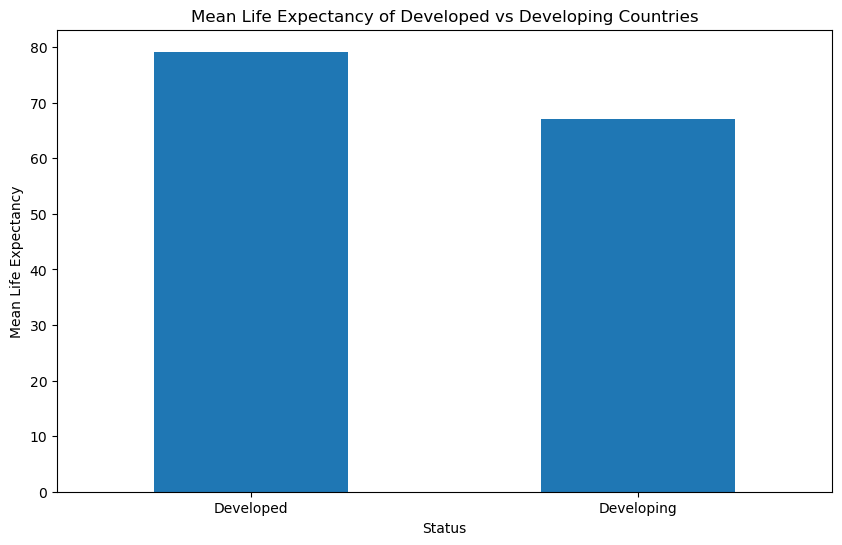

In [85]:
dev_df = cyslg_df.groupby('Status')['Life expectancy'].mean()

dev_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Life Expectancy of Developed vs Developing Countries')
plt.xlabel('Status')
plt.ylabel('Mean Life Expectancy')
plt.xticks(rotation=0) 

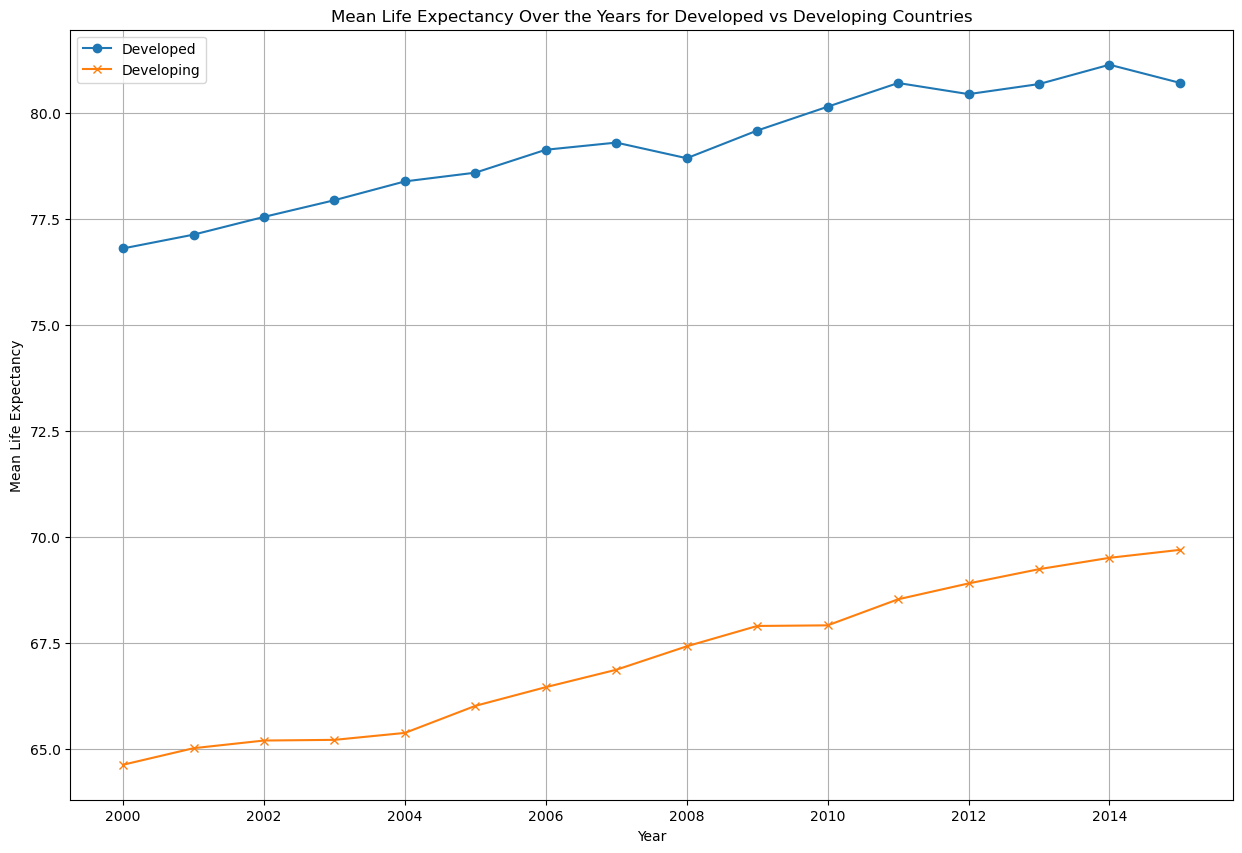

In [71]:
dev_year_df = cyslg_df.groupby(['Status', 'Year'])['Life expectancy'].mean().reset_index()
dev_year_pivot = dev_year_df.pivot(index='Year', columns='Status', values='Life expectancy')

plt.figure(figsize=(15, 10))
plt.plot(dev_year_pivot.index, dev_year_pivot['Developed'], label='Developed', marker='o')
plt.plot(dev_year_pivot.index, dev_year_pivot['Developing'], label='Developing', marker='x')

plt.xlabel('Year')
plt.ylabel('Mean Life Expectancy')
plt.title('Mean Life Expectancy Over the Years for Developed vs Developing Countries')
plt.legend()
plt.grid(True)

Text(0.5, 1.0, 'Mean Life Expectancy across GDP Ranges')

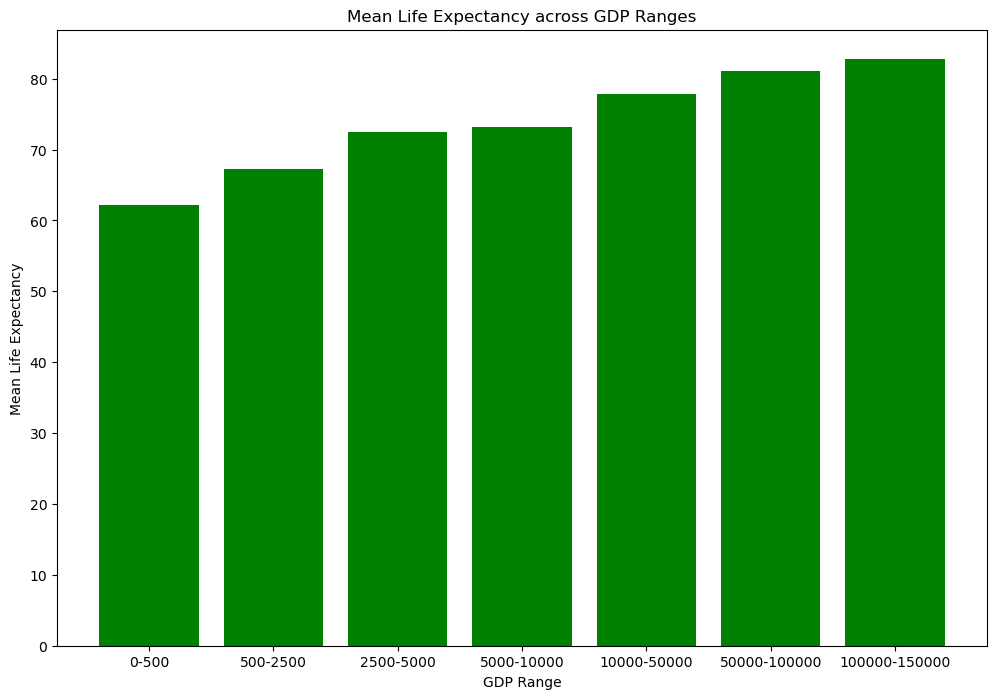

In [84]:
gdp_df = cyslg_df.copy()
bins = [0, 500, 2500, 5000, 10000, 50000, 100000, 150000]
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
gdp_df['GDP_range'] = pd.cut(gdp_df['GDP'], bins=bins, labels=labels, right=False)
gdp_df = gdp_df.groupby('GDP_range')['Life expectancy'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.bar(gdp_df['GDP_range'], gdp_df['Life expectancy'], color='green')
plt.xlabel('GDP Range')
plt.xticks(rotation=0) 
plt.ylabel('Mean Life Expectancy')
plt.title('Mean Life Expectancy across GDP Ranges')